#Scaling and Standardization 

In [1]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

##Scaling vs. Normalization:
They are very similar! In both cases, we re transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that:

* in scaling, we are  changing the range of our data.
* in normalization, we are changing the shape of the distribution of our data.

##Scaling
Here, we are transforming our data so that it fits within a specific scale, like 0-100 or 0-1. We scale data when we are using methods based on measures of how far apart data points are, like support vector machines (SVM) or k-nearest neighbors (KNN). With these algorithms, a change of "1" in any numeric feature is given the same importance.


For example, we might be looking at the prices of some products in both Yen and US Dollars. One US Dollar is worth about 100 Yen, but if we don't scale our prices, methods like SVM or KNN will consider a difference in price of 1 Yen as important as a difference of 1 US Dollar! 

This clearly doesn't fit with our intuitions of the world. With currency, we can convert between currencies. But what about if we're looking at something like height and weight? It's not entirely clear how many kilograms should equal one meter.

By scaling our variables, we can help compare different variables on equal footing.

In [2]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

In [3]:
original_data[:10]

array([0.79587451, 1.25593076, 0.92322315, 0.78720115, 0.55104849,
       1.03815929, 0.5755192 , 2.22352441, 3.31491218, 0.4836021 ])

In [4]:
scaled_data[:10]

array([[0.09290694],
       [0.14664878],
       [0.10778327],
       [0.09189375],
       [0.06430738],
       [0.12120963],
       [0.06716595],
       [0.25967902],
       [0.38717038],
       [0.05642858]])

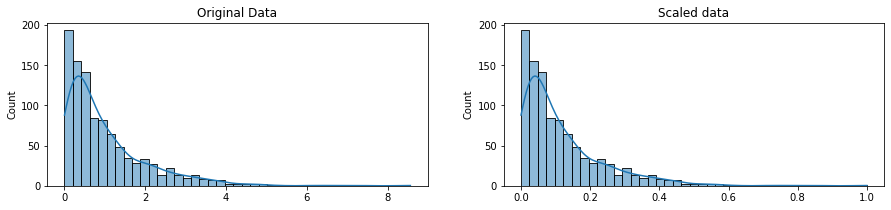

In [5]:
# plot both datasets together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

Notice that the shape of the data doesn't change. But data ranged from 0 to 8, after scaling ranges from 0 to 1.

##Normalization
Normalization is a more radical transformation. The point of normalization is to change our observations so that they can be described as a normal distribution.

Normal distribution takes the shape of a "bell curve", which is is a specific statistical distribution where a roughly equal observations fall above and below the mean. The mean and the median are the same, andthere are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, we'll normalize our data if we're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Gaussian naive Bayes.

The method we're using to normalize here is called the Box-Cox Transformation.

In [12]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)
normalized_data
#original_data

(array([-0.22212062,  0.23427768, -0.07911706, -0.23247555, -0.55495228,
         0.03761946, -0.5171396 ,  0.88159381,  1.39032005, -0.66621063,
         0.47583326, -0.27457467, -0.17137354,  1.07417631, -1.93388176,
        -1.81769861, -2.52061524,  0.62361343,  0.43027336,  0.77833579,
         1.59225785,  0.50144209, -0.45295886,  0.43813594, -1.62973741,
         0.02125996, -1.50157409,  1.21197553, -0.29312863, -0.57953899,
        -1.02646264,  0.41736265, -0.46721082, -0.17034415, -2.54921859,
        -0.03919746, -0.05410238, -0.04108732,  1.20458444,  0.13777305,
        -0.73433115, -0.51864059,  0.18300978, -2.02289682,  0.0954058 ,
         0.10624095, -1.21800707, -1.57328948, -0.8648075 , -0.7222475 ,
        -0.16568278, -0.51439891,  1.79968877, -1.72276068, -1.22371274,
        -1.41860856,  0.0574782 , -1.06435803, -0.44006517, -1.09483097,
        -1.42907197, -1.67384934,  0.06638293, -1.52670477, -1.27123962,
        -0.70790097,  0.57974359, -1.75309449,  0.6

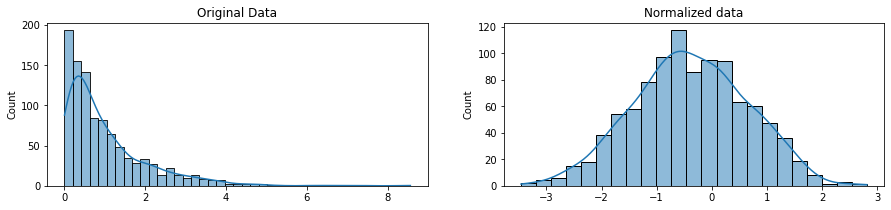

In [13]:
# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

Notice that the shape of our data has changed. Before normalizing it was almost L-shaped. But after normalizing it looks more like the outline of a bell curve.

https://sebastianraschka.com/Articles/2014_about_feature_scaling.html